In [1]:
import os

# Importando bibliotecas para análise de dados
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

Heurísticas empregadas

    - PMH - Prunning MST Heuristic
    - SPH - Shortest Path Heuristic
    - SPHPrim - Shortest Path Heuristic with Prim
    - SPHO - Shortest Path Heuristic with Origin

In [2]:
HEURISTICAS = ["PMH", "SPH", "SPHPrim", "SPHO"]

In [3]:
filename = os.path.join("..", "outputdata", "heuristics","results.csv")

df_data = pd.read_csv(filename)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Heuristic       5400 non-null   object
 1   Problem         5400 non-null   object
 2   Node            5400 non-null   int64 
 3   Is terminal     5400 non-null   bool  
 4   Cost            5400 non-null   int64 
 5   Global Optimum  5400 non-null   int64 
 6   Success         5400 non-null   bool  
dtypes: bool(2), int64(3), object(2)
memory usage: 221.6+ KB


In [4]:
df_data.head()

,Heuristic,Problem,Node,Is terminal,Cost,Global Optimum,Success
0,PMH,B1,1,False,88,82,False
1,PMH,B1,2,False,89,82,False
2,PMH,B1,3,False,99,82,False
3,PMH,B1,4,False,89,82,False
4,PMH,B1,5,False,89,82,False


In [5]:
def boxplot_heuristics(dataset,show=False):
    fig = plt.figure(figsize=(12,6))

    sns.boxplot(x="Cost", 
                y="Heuristic",
                data=df_data[df_data['Problem'] == dataset],
                palette="vlag",
               )

    plt.title(label=f'Variação dos resultados para instância {dataset}')
    plt.xlabel("Custo")
    plt.ylabel("Heurística")

    fig.savefig(f"boxplot_{dataset}.png")
    
    if not show:
        plt.close()

In [6]:
## Plotar os gráficos para todas as instâncias

# instances = (f'B{i}' for i in range(1,19))

# for dataset in instances:
#     boxplot_heuristics(dataset)

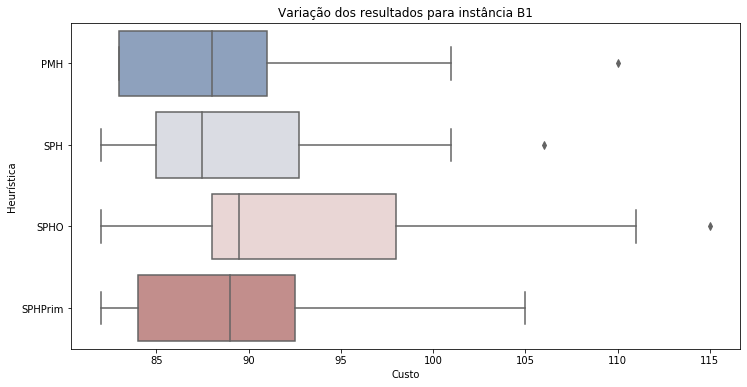

In [7]:
boxplot_heuristics("B1", show=True)

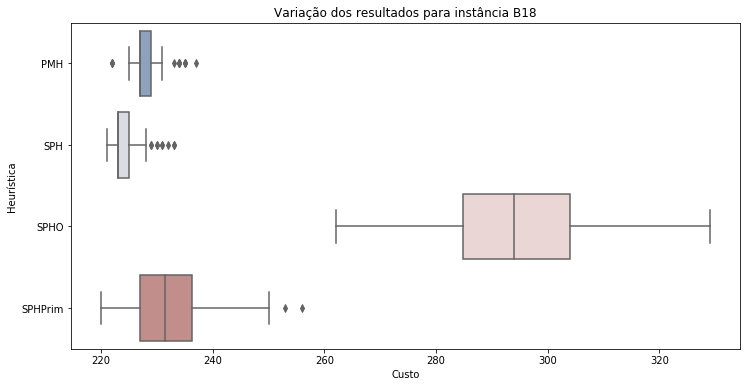

In [8]:
boxplot_heuristics("B18", show=True)

In [9]:
df_freq = df_data.groupby(['Heuristic', 'Problem', 'Success']) \
            .agg('count') \
            .drop(['Is terminal', 'Cost','Global Optimum'], axis='columns')\
            .rename(columns={"Node" : "Count"})

In [10]:
# df_freq.loc["SPHPrim"]

In [11]:
# df_freq.loc["SPH"]

In [12]:
def perct(x):
    return (x / np.sum(x)) * 100

In [13]:
# df = df_freq.unstack().fillna(0).reset_index()

df = df_freq.unstack("Success")\
        .fillna(0)\
        .apply(perct, axis=1)\
        .reset_index()\
        .round(2)

In [14]:
df.head()

Heuristic Problem  Count     
Success                    False True
0             PMH      B1  100.0  0.0
1             PMH     B10  100.0  0.0
2             PMH     B11  100.0  0.0
3             PMH     B12  100.0  0.0
4             PMH     B13  100.0  0.0

In [15]:
df.columns

MultiIndex([('Heuristic',    ''),
            (  'Problem',    ''),
            (    'Count', False),
            (    'Count',  True)],
           names=[None, 'Success'])

In [16]:
df.columns = ["Heuristic", "Problem", "Fail Count", "Success Count"]

In [17]:
df.head()

,Heuristic,Problem,Fail Count,Success Count
0,PMH,B1,100.0,0.0
1,PMH,B10,100.0,0.0
2,PMH,B11,100.0,0.0
3,PMH,B12,100.0,0.0
4,PMH,B13,100.0,0.0


In [18]:
categorical_order = [f'B{i}' for i in range(1,19)]

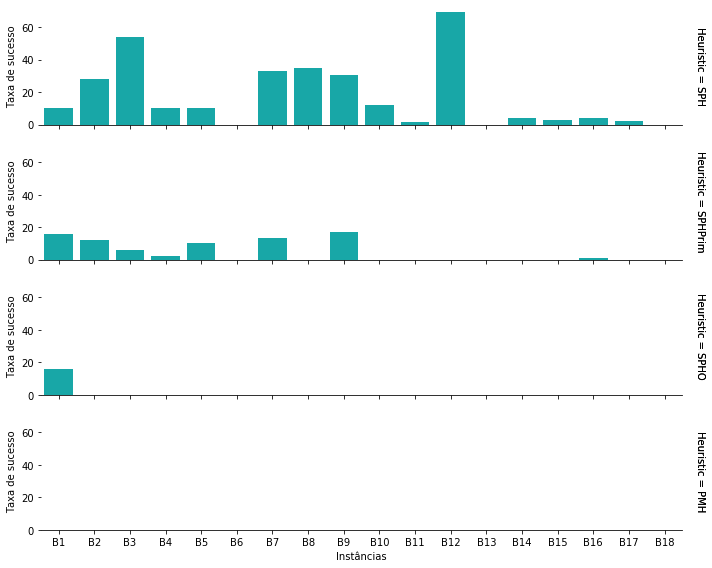

In [20]:
grid = sns.catplot(
            x="Problem",
            y="Success Count",
            data=df,
            row="Heuristic",
            kind="bar",
            color="c",
            order=categorical_order,
            row_order=["SPH", "SPHPrim", "SPHO", "PMH"],
            margin_titles=True,
            height=2,
            aspect=5,
           )

(grid.set_titles("{row_var} {row_name}")
     .set_xlabels("Instâncias")
     .set_ylabels("Taxa de sucesso")
    .despine(left=True))